In [3]:
from numpy.polynomial.polynomial import Polynomial
from operator import mul
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np

In [107]:
def lagrangeInterpolation(x, y):
    """
    Calculates the Lagrange interpolation polynomial for given set of interpolation nodes.
    """
    nodes = list(zip(x, y))
    n = len(nodes)
    
    polyFactor = lambda k, i : Polynomial(( (-x[i])/(x[k] - x[i]), 1/(x[k] - x[i]) ))
    
    result = Polynomial(0.)
    for k in range(n):
        
        factors = [polyFactor(k, i) for i in range(n) if i != k]
        result += reduce(mul, factors) * y[k]
        
    return result

In [92]:
def newtonInterpolation(x, y):
    """
    Calculates interpolation polynomial based on the Newton's divided differences method.
    """
    nodes = list(zip(x, y))
    n = len(nodes)
    
    result = Polynomial(y[0])
    basePoly = Polynomial(1.)
    
    diffs = [(y[k + 1] - y[k]) / (x[k + 1] - x[k]) for k in range(n - 1)]
    
    for i in range(1, n):
        basePoly *= Polynomial((-x[i - 1], 1))
        result += basePoly * diffs[0]
        
        diffs = [(diffs[k + 1] - diffs[k]) / (x[k + i + 1] - x[k]) for k in range(n - i - 1)]
        
    return result

In [108]:
a = lagrangeInterpolation((1, 2, 3), (1, 2, 1))
b = newtonInterpolation((1, 2, 3), (1, 2, 1))

In [109]:
print(a)
print(b)

poly([-2.  4. -1.])
poly([-2.  4. -1.])


In [88]:
b(1)

0.0

In [93]:
x = np.arange(1, 10)
y = np.random.rand(len(x))

In [94]:
print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[0.06150073 0.84495539 0.4140167  0.29771568 0.74533363 0.75612595
 0.44869822 0.61672864 0.77683549]


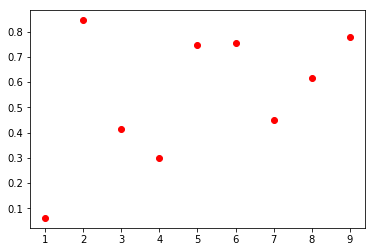

In [95]:
plt.plot(x, y, 'ro')

In [116]:
fit1 = newtonInterpolation(x, y)
fit2 = lagrangeInterpolation(x, y)
print(fit1.coef)
print(fit2.coef)
print(fit1.coef - fit2.coef)

[ 9.17721129e+00 -2.85065756e+01  3.35691775e+01 -1.92790804e+01
  6.11193164e+00 -1.12388043e+00  1.19346037e-01 -6.78953904e-03
  1.60196047e-04]
[ 9.17721129e+00 -2.85065756e+01  3.35691775e+01 -1.92790804e+01
  6.11193164e+00 -1.12388043e+00  1.19346037e-01 -6.78953904e-03
  1.60196047e-04]
[ 0.00000000e+00 -7.10542736e-15  4.26325641e-14 -2.13162821e-14
  2.66453526e-15  2.22044605e-16  1.24900090e-16 -3.46944695e-18
  5.42101086e-20]


In [104]:
a = [1, 2, 3, 4, 5]
a[1:2] + a[3:4]

[2, 4]

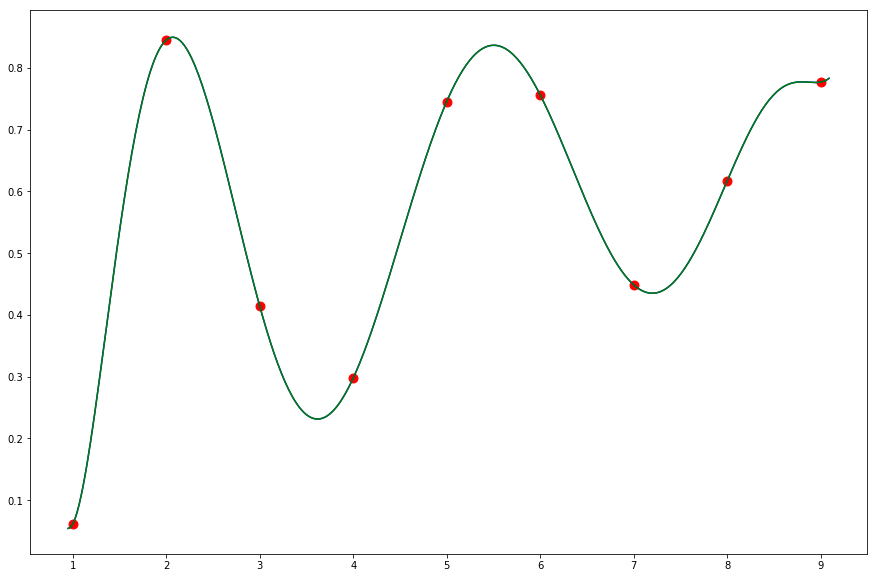

In [121]:
x2 = np.arange(0.95, 9.1, 0.02)

plt.figure(figsize=(15,10))
plt.scatter(x, y, s=80, c='r')
plt.plot(x2, fit1(x2), c='b')
plt.plot(x2, fit2(x2), c='g')